In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on Restaurant and Market Health Inspections

In [209]:
rdf = pd.read_csv('Restaurant_and_Market_Health_Inspections.csv')
rdf.dtypes # print the columns name and their types

serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object

In [210]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67573 entries, 0 to 67572
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial_number        67573 non-null  object
 1   activity_date        67573 non-null  object
 2   facility_name        67573 non-null  object
 3   score                67573 non-null  int64 
 4   grade                67570 non-null  object
 5   service_code         67573 non-null  int64 
 6   service_description  67573 non-null  object
 7   employee_id          67573 non-null  object
 8   facility_address     67573 non-null  object
 9   facility_city        67573 non-null  object
 10  facility_id          67573 non-null  object
 11  facility_state       67573 non-null  object
 12  facility_zip         67573 non-null  object
 13  owner_id             67573 non-null  object
 14  owner_name           67573 non-null  object
 15  pe_description       67573 non-null  object
 16  prog

In [211]:
rdf['activity_date'] = pd.to_datetime(rdf['activity_date'], format='%m/%d/%Y %I:%M:%S %p')
rdf.head() # print initial rows of the data

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,2017-12-29,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,2017-12-29,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,2017-12-29,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,2017-12-29,TRINITI ECHO PARK,94,A,1,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,FA0252528,CA,90026-3227,OW0246287,AMERICAN HOSPITALITY,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,PR0201836
4,DAXV2RMYC,2017-12-29,POLLEN,94,A,1,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,FA0252789,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,PR0202148


In [212]:
rdf.tail() # print last rows of the data

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
67568,DAZZ4BFUD,2018-06-15,RAMEN MARUYA,94,A,1,ROUTINE INSPECTION,EE0000360,104 JAPANESE VILLAGE PLZ MALL,LOS ANGELES,FA0159703,CA,90012,OW0124708,RAMEN MARUYA INC,RESTAURANT (31-60) SEATS HIGH RISK,1635,RAMEN MARUYA,ACTIVE,PR0147764
67569,DAZZ4TRBY,2018-05-16,KANG WON DO,96,A,1,ROUTINE INSPECTION,EE0000723,4050 W WASHINGTON BLVD,LOS ANGELES,FA0137540,CA,90018,OW0100601,KANG WON DO CORPORATION,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",1613,KANG WON DO,ACTIVE,PR0121641
67570,DAZZ9YUS4,2018-04-20,OASIS MARKET,91,A,1,ROUTINE INSPECTION,EE0000594,4312 WALL ST,LOS ANGELES,FA0170167,CA,90011,OW0178002,"MCLELLAN INVESTMENTS, LLC","FOOD MKT RETAIL (2,000+ SF) HIGH RISK",1615,OASIS MARKET,ACTIVE,PR0160629
67571,DAZZJBQUO,2018-04-17,TEN TEN YU RAMEN,95,A,1,ROUTINE INSPECTION,EE0000375,2012 SAWTELLE BLVD,LOS ANGELES,FA0225467,CA,90025,OW0229730,"WAO, INC.",RESTAURANT (31-60) SEATS HIGH RISK,1635,TEN TEN YU RAMEN,ACTIVE,PR0180788
67572,DAZZL6GP3,2018-06-07,SUPERIOR GROCERS #113,97,A,1,ROUTINE INSPECTION,EE0000557,3600 E CESAR E CHAVEZ AVE,LOS ANGELES,FA0049848,CA,90063,OW0034460,"SUPER CENTER CONCEPTS, INC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,SUPERIOR GROCERS #113 TORTIL,ACTIVE,PR0019416


In [213]:
rdf.describe() # describe the numerical portion of data

,activity_date,score,service_code,program_element_pe
count,67573,67573.000000,67573.000000,67573.000000
mean,2017-01-24 08:12:17.335918336,93.361890,7.618028,1629.463454
min,2015-07-01 00:00:00,64.000000,1.000000,1610.000000
25%,2016-04-21 00:00:00,91.000000,1.000000,1631.000000
50%,2017-01-19 00:00:00,94.000000,1.000000,1632.000000
75%,2017-10-30 00:00:00,96.000000,1.000000,1635.000000
max,2018-07-31 00:00:00,100.000000,401.000000,1641.000000
std,NaN,3.982303,51.024028,9.414625


In [214]:
rdf.isnull().sum() # Finding the null values in the data 

serial_number           0
activity_date           0
facility_name           0
score                   0
grade                   3
service_code            0
service_description     0
employee_id             0
facility_address        0
facility_city           0
facility_id             0
facility_state          0
facility_zip            0
owner_id                0
owner_name              0
pe_description          0
program_element_pe      0
program_name           29
program_status          0
record_id               0
dtype: int64

The dataset is described as containing data exclusively for the city of *Los Angeles*.<BR>
This is confirmed by checking the unique values in the _facility_city_ column:

In [215]:
print("Unique 'facility_city' values: ", rdf['facility_city'].unique()) # Confirms that all entries are for Los Angeles
print("Unique 'facility_state' values: ", rdf['facility_state'].unique())

Unique 'facility_city' values:  ['LOS ANGELES']
Unique 'facility_state' values:  ['CA']


## Cleaning the data

The following columns are not required for our analysis: facility_name, facility_city, facility_state, facility_address, facility_id, owner_id, owner_name, employee_id, serial_number, and record_id. Therefore, we will remove them from the dataset.

In [216]:
columns_to_remove = ['facility_name', 'facility_city','facility_address', 'facility_id',  'facility_state', 
                     'owner_id', 'owner_name', 'employee_id', 
                     'serial_number', 'record_id']

rdf = rdf.drop(columns=columns_to_remove)

rdf.head()

,activity_date,score,grade,service_code,service_description,facility_zip,pe_description,program_element_pe,program_name,program_status
0,2017-12-29,95,A,1,ROUTINE INSPECTION,90065,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE
1,2017-12-29,92,A,1,ROUTINE INSPECTION,90045,RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE
2,2017-12-29,93,A,1,ROUTINE INSPECTION,90028,RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE
3,2017-12-29,94,A,1,ROUTINE INSPECTION,90026-3227,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE
4,2017-12-29,94,A,1,ROUTINE INSPECTION,90026,RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE


In [217]:
print("Minimum Score: ", min(rdf.score))
print("Maxumum Score: ", max(rdf.score))
print("Unique Values of 'Grade'", rdf['grade'].unique())

Minimum Score:  64
Maxumum Score:  100
Unique Values of 'Grade' ['A' 'B' 'C' ' ' nan]


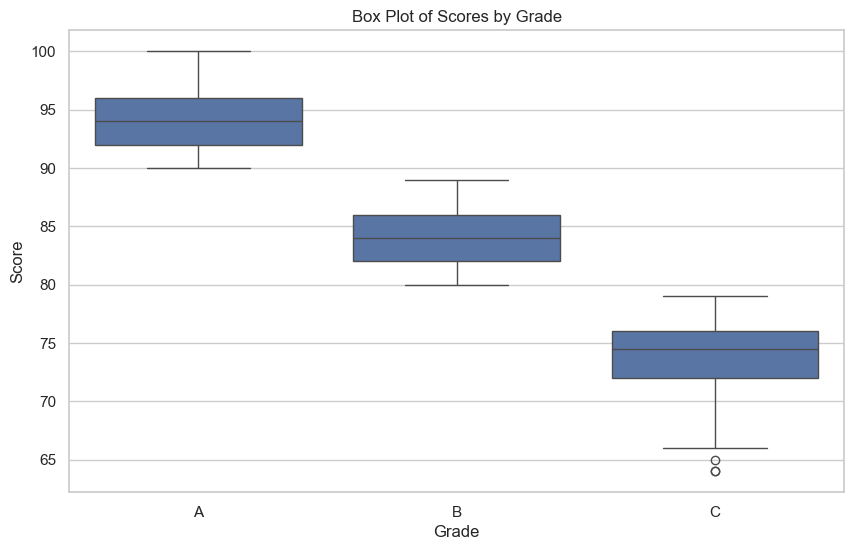

In [218]:
# As we observed that the Grade has some empty and NaN values. We can find where they are and fix them
plt.figure(figsize=(10, 6))
sns.boxplot(data=rdf, x='grade', y='score', order=['A', 'B', 'C'])
plt.title('Box Plot of Scores by Grade')
plt.xlabel('Grade')
plt.ylabel('Score')
plt.show()

In [220]:
# Assigning grades to column with invalid grades.
def assign_grade(score):
    if score > 90:
        return 'A'
    elif 80 < score <= 90:
        return 'B'
    else:
        return 'C'

# Update only the grades that are not 'A', 'B', or 'C'
rdf.loc[~rdf['grade'].isin(['A', 'B', 'C']), 'grade'] = rdf['score'].apply(assign_grade)

filtered_df = rdf[~rdf['grade'].isin(['A', 'B', 'C'])]
filtered_df

,activity_date,score,grade,service_code,service_description,facility_zip,pe_description,program_element_pe,program_name,program_status


**Analysis of Grade Assignment Based on Source**

We observe from the above plot that this rule is being followed to assign grades based on the scores.

- **Grade A** : Above 90
- **Grade B** : Above 80 and Below 90
- **Grade C** : Below 80

Additionaly, we can observe that the score ranges from 60 to 100.

### Normalize the Zip Codes
Some ZIP codes in the dataset are in a 5-3 format (e.g., 12345-678) while others are in the standard 5-digit format (e.g., 12345). To ensure consistency, we will normalize all ZIP codes to the 5-digit format by removing any additional parts after the first 5 digits.

In [221]:
rdf['facility_zip'] = rdf['facility_zip'].astype(str).str[:5].astype(int)
rdf['facility_zip'].unique()

array([90065, 90045, 90028, 90026, 90034, 90043, 90020, 91604, 90027,
       90006, 90010, 90064, 90004, 90046, 90005, 90015, 90048, 90023,
       90057, 90047, 90039, 90042, 90012, 90062, 90035, 90071, 90013,
       90017, 90021, 90033, 90070, 90291, 90068, 90031, 90041, 90014,
       90036, 90024, 90008, 91367, 90022, 90037, 90001, 90061, 90044,
       90063, 90011, 90019, 90066, 90038, 90016, 90049, 90058, 90059,
       90025, 91324, 90069, 90007, 90067, 90211, 90002, 90018, 90003,
       90089, 90032, 90029, 90077, 90056, 90040, 91325, 91505, 90232,
       90230, 90094, 90095, 90103, 92880, 90054, 91326, 90292, 90052,
       90921, 90220, 90723, 90293, 90079, 90051, 91602, 91307, 91006,
       90030, 90222, 90272, 91340, 91601, 90201, 90053, 90255, 91401])

# Distribution


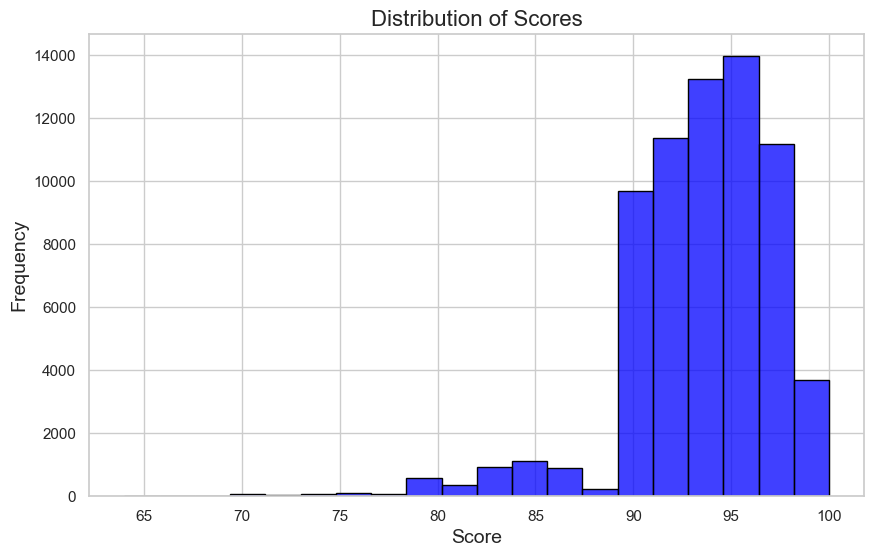

In [223]:
# Distribution of Scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(rdf['score'], bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

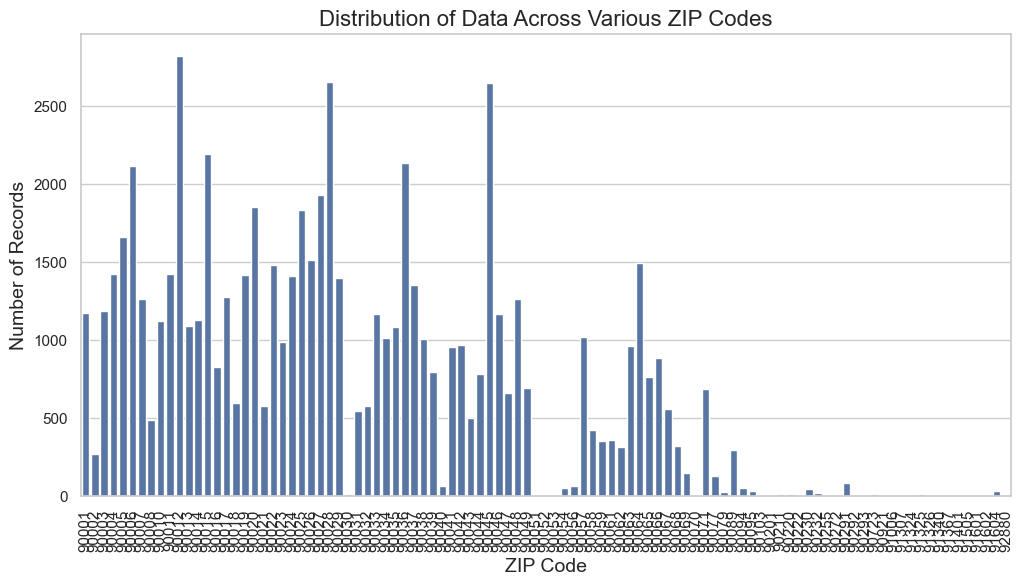

In [225]:
# Distribution of Data over various zipcodes
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))

zip_code_counts = rdf['facility_zip'].value_counts()

sns.barplot(x=zip_code_counts.index, y=zip_code_counts.values)

plt.title('Distribution of Data Across Various ZIP Codes', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

plt.xticks(rotation=90)

plt.show()

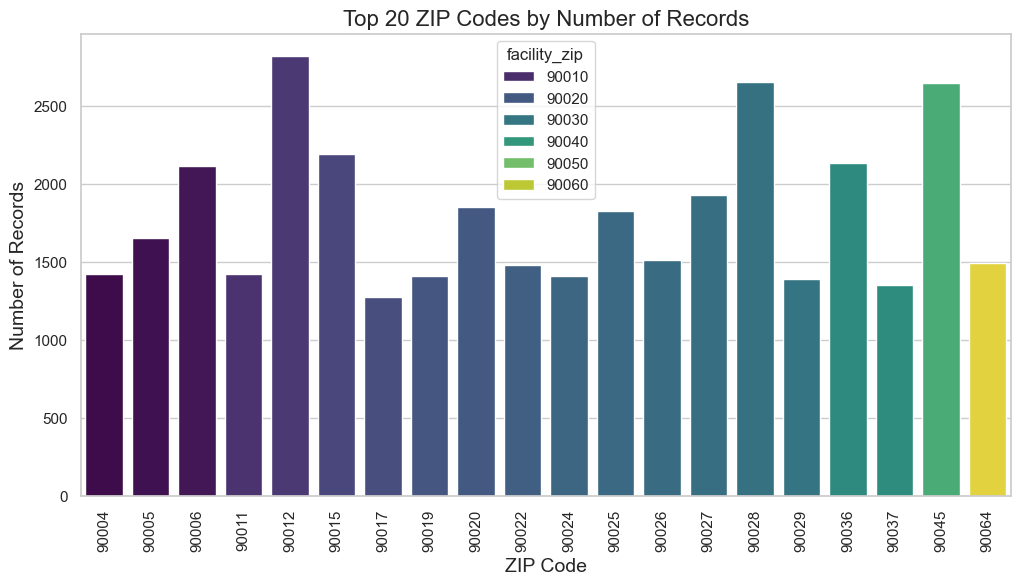

In [226]:
# Because, this dataset has too many zip codes we limit to top 20
top_n = 20
#[2] - ChatGPT:  Better Looking Plot


top_zip_codes = rdf['facility_zip'].value_counts().nlargest(top_n)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette='viridis', hue=top_zip_codes.index)

plt.title(f'Top {top_n} ZIP Codes by Number of Records', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)


plt.xticks(rotation=90)
plt.show()

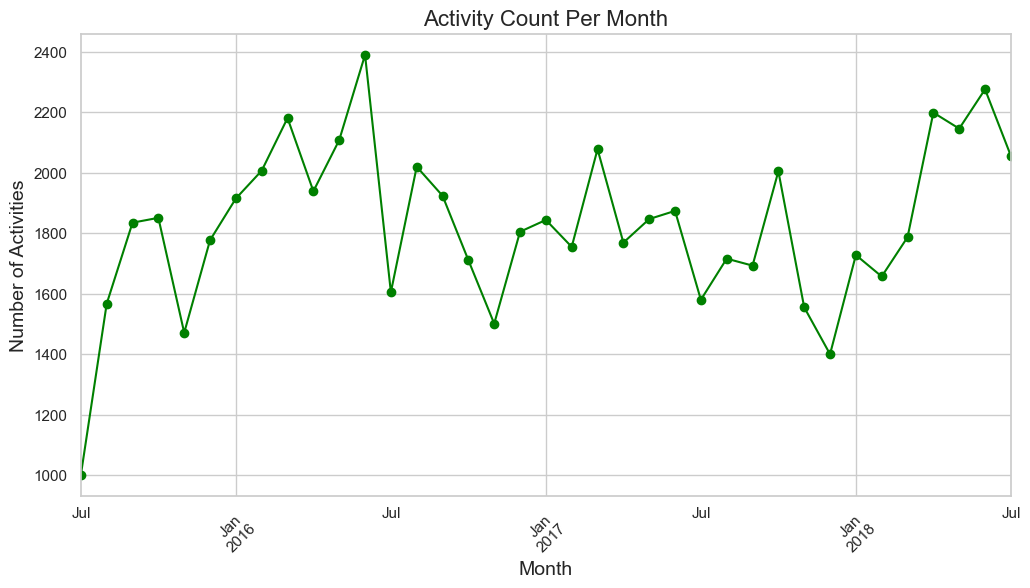

In [227]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Group by month and plot the size of each group
rdf.groupby(rdf['activity_date'].dt.to_period('M')).size().plot(marker='o', linestyle='-', color='green')


plt.title('Activity Count Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Activities', fontsize=14)

plt.xticks(rotation=45)  
plt.grid(True)

# Show the plot
plt.show()

In [228]:
# mapping the grade and program_status
grade_mapping = {'A': 3, 'B': 2, 'C': 1}
status_mapping = {'INACTIVE': 0, 'ACTIVE': 1}
rdf['graden'] = rdf['grade'].map(grade_mapping)
rdf['program_statusn'] = rdf['program_status'].map(status_mapping)
rdf.describe()

,activity_date,score,service_code,facility_zip,program_element_pe,graden,program_statusn
count,67573,67573.000000,67573.000000,67573.000000,67573.000000,67573.000000,67573.000000
mean,2017-01-24 08:12:17.335918336,93.361890,7.618028,90031.934071,1629.463454,2.929336,0.868587
min,2015-07-01 00:00:00,64.000000,1.000000,90001.000000,1610.000000,1.000000,0.000000
25%,2016-04-21 00:00:00,91.000000,1.000000,90014.000000,1631.000000,3.000000,1.000000
50%,2017-01-19 00:00:00,94.000000,1.000000,90027.000000,1632.000000,3.000000,1.000000
75%,2017-10-30 00:00:00,96.000000,1.000000,90042.000000,1635.000000,3.000000,1.000000
max,2018-07-31 00:00:00,100.000000,401.000000,92880.000000,1641.000000,3.000000,1.000000
std,NaN,3.982303,51.024028,58.249848,9.414625,0.274985,0.337854


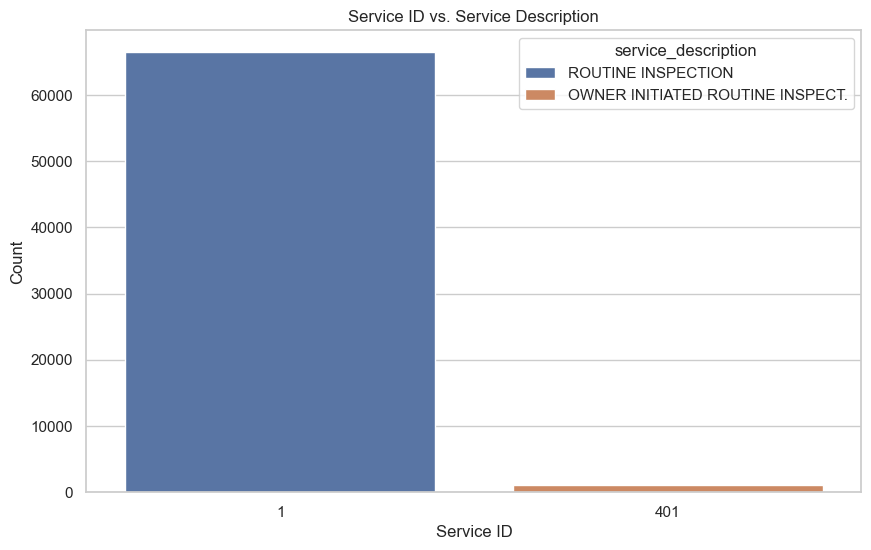

In [229]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rdf, x='service_code', hue='service_description')
plt.title('Service ID vs. Service Description')
plt.xlabel('Service ID')
plt.ylabel('Count')
plt.show()

**Observation**: Service Descriptions by Service ID

- The dataset contains only two unique service_id values: 1 and 401.
- The service_description associated with these IDs is as follows:
- Service ID **401**: “OWNER INITIATED ROUTINE INSPECT.”
- Service ID **1**: “ROUTINE INSPECTION”

In [230]:
# Compare the scores and grades of two different service types.
rdf1 = rdf[rdf['service_code']==1]
rdf401 = rdf[rdf['service_code']==401]

desc_df1 = rdf1.describe() 
desc_df2 = rdf401.describe()


comparison = pd.concat([desc_df1, desc_df2], axis=1, keys=['DF1', 'DF2'])
comparison


DF1                                           \
                       activity_date         score service_code  facility_zip   
count                          66455  66455.000000      66455.0  66455.000000   
mean   2017-01-24 18:38:15.700850176     93.371063          1.0  90031.898819   
min              2015-07-01 00:00:00     64.000000          1.0  90001.000000   
25%              2016-04-22 00:00:00     91.000000          1.0  90014.000000   
50%              2017-01-19 00:00:00     94.000000          1.0  90027.000000   
75%              2017-10-31 00:00:00     96.000000          1.0  90042.000000   
max              2018-07-31 00:00:00    100.000000          1.0  92880.000000   
std                              NaN      3.987104          0.0     58.317249   

                                                        \
      program_element_pe        graden program_statusn   
count       66455.000000  66455.000000    66455.000000   
mean         1629.393138      2.929336        0.868783   
min          1610.000000      1.000000        0.000000   
25%          1631.000000      3.000000        1.000000   
50%          1632.000000      3.000000        1.000000   
75%          1635.000000      3.000000        1.000000   
max          1641.000000      3.000000        1.000000   
std             9.443479      0.275070        0.337640   

                                 DF2                                          \
                       activity_date        score service_code  facility_zip   
count                           1118  1118.000000       1118.0   1118.000000   
mean   2016-12-29 12:03:51.842576128    92.816637        401.0  90034.029517   
min              2015-07-01 00:00:00    71.000000        401.0  90001.000000   
25%              2016-03-07 06:00:00    91.000000        401.0  90017.000000   
50%              2017-01-17 12:00:00    93.000000        401.0  90028.000000   
75%              2017-10-05 00:00:00    95.000000        401.0  90045.000000   
max              2018-07-31 00:00:00   100.000000        401.0  91604.000000   
std                              NaN     3.646095          0.0     54.075795   

                                                       
      program_element_pe       graden program_statusn  
count        1118.000000  1118.000000     1118.000000  
mean         1633.643113     2.929338        0.856887  
min          1610.000000     1.000000        0.000000  
25%          1632.000000     3.000000        1.000000  
50%          1635.000000     3.000000        1.000000  
75%          1638.000000     3.000000        1.000000  
max          1641.000000     3.000000        1.000000  
std             6.209892     0.269981        0.350344

In [269]:
print(rdf['pe_description'].unique())

['RESTAURANT (0-30) SEATS MODERATE RISK'
 'RESTAURANT (0-30) SEATS LOW RISK' 'RESTAURANT (0-30) SEATS HIGH RISK'
 'FOOD MKT RETAIL (2,000+ SF) LOW RISK'
 'RESTAURANT (61-150) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS HIGH RISK'
 'RESTAURANT (61-150) SEATS MODERATE RISK'
 'RESTAURANT (151 + ) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (1-1,999 SF) HIGH RISK'
 'RESTAURANT (151 + ) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK'
 'RESTAURANT (31-60) SEATS LOW RISK' 'RESTAURANT (151 + ) SEATS LOW RISK'
 'FOOD MKT RETAIL (2,000+ SF) HIGH RISK'
 'FOOD MKT RETAIL (1-1,999 SF) LOW RISK'
 'FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK'
 'RESTAURANT (61-150) SEATS LOW RISK'
 'FOOD PROCESSING WHOLESALE (2,000-5,999 SF)'
 'FOOD MKT RETAIL (25-1,999 SF) HIGH RISK'
 'LIC HTH CARE FOOD FAC (4000-9999 SF)HIGH RISK'
 'FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK' 'FOOD MARKET WHOLESALE'
 'CATERER (0-999 SQ. FT.)' 'FOOD MKT RETAIL (25-1,999 SF) LOW RISK'

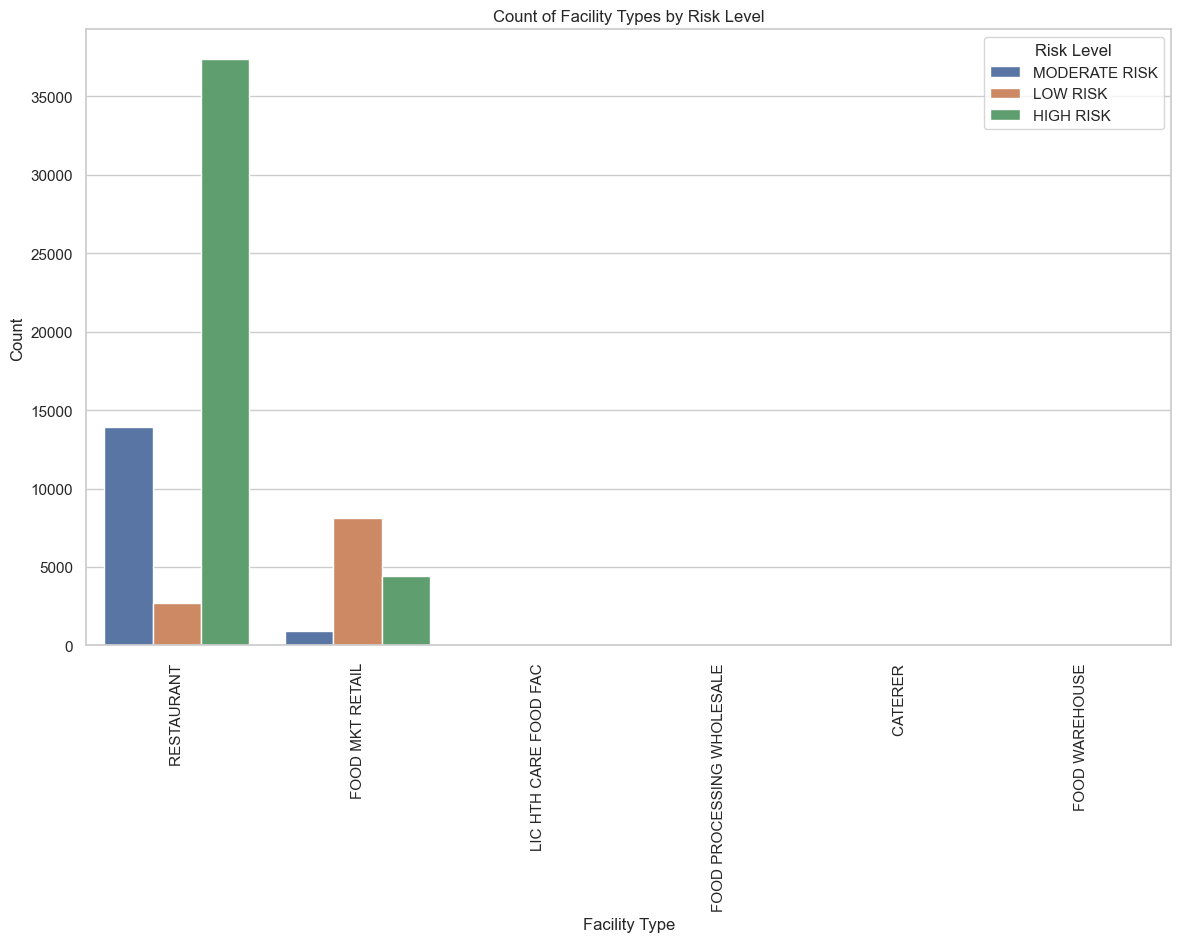

In [231]:
# Extract facility type and risk level from pe_description
#[3]: ChatGPT Prompt: Write re to find this HIGH RISK|MODERATE RISK|LOW RISK  pattern in the string
rdf['facility_type'] = rdf['pe_description'].str.extract(r'^(.*?)\(') 
rdf['risk_level'] = rdf['pe_description'].str.extract(r'(HIGH RISK|MODERATE RISK|LOW RISK)')

plt.figure(figsize=(14, 8))
sns.countplot(data=rdf, x='facility_type', hue='risk_level', order=rdf['facility_type'].value_counts().index)
plt.title('Count of Facility Types by Risk Level')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Risk Level')
plt.show()

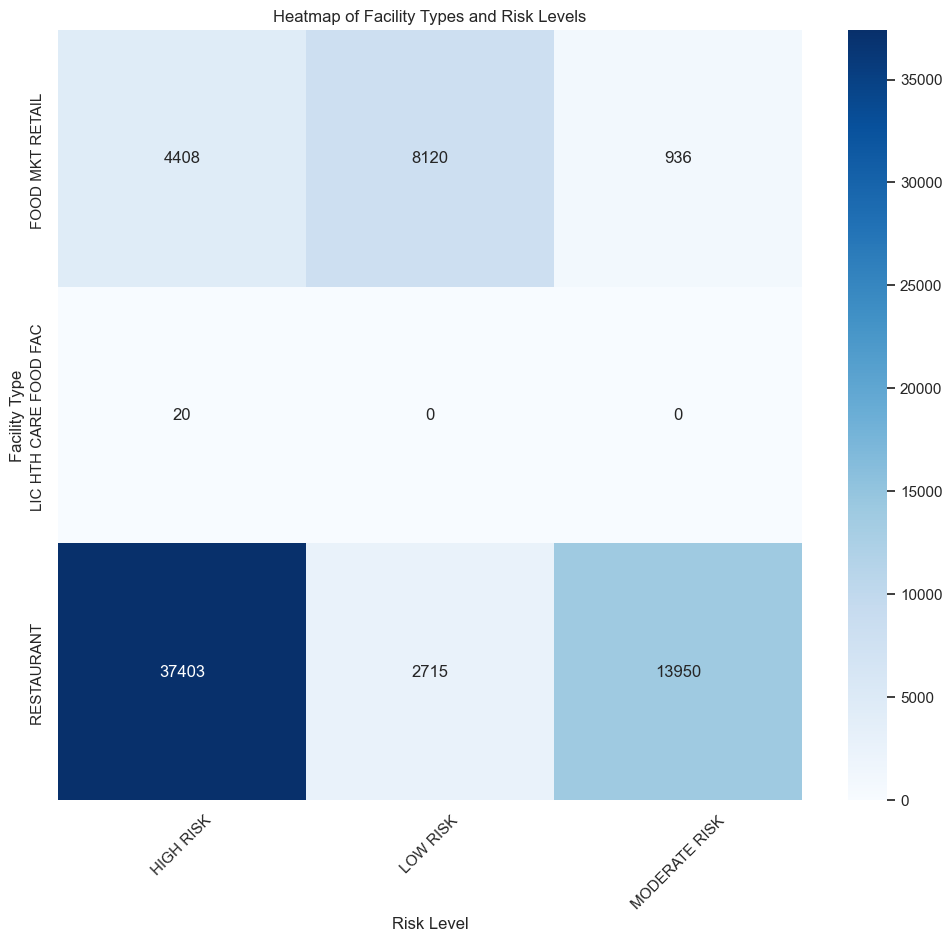

In [232]:
#[2] - PIVOT TABLE, Heat Table
pivot_table = rdf.pivot_table(index='facility_type', columns='risk_level', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Facility Types and Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Facility Type')
plt.xticks(rotation=45)
plt.show()

As we can observe from the above plot that the Restaurant have much higher no. of facilities tagged as high risk as compared to other ones.

In [233]:
rdf.facility_type.unique()

array(['RESTAURANT ', 'FOOD MKT RETAIL ', 'FOOD PROCESSING WHOLESALE ',
       'LIC HTH CARE FOOD FAC ', nan, 'CATERER ', 'FOOD WAREHOUSE '],
      dtype=object)

In [234]:
rdf.program_element_pe.unique()

array([1631, 1630, 1632, 1613, 1638, 1635, 1637, 1641, 1634, 1612, 1640,
       1614, 1633, 1639, 1615, 1610, 1611, 1636])

In [235]:
rdf.corr(numeric_only=True)

,score,service_code,facility_zip,program_element_pe,graden,program_statusn
score,1.000000,-0.017759,0.023830,-0.171470,0.707062,0.101652
service_code,-0.017759,1.000000,0.004666,0.057583,0.000001,-0.004491
facility_zip,0.023830,0.004666,1.000000,0.015306,0.018135,0.015439
program_element_pe,-0.171470,0.057583,0.015306,1.000000,-0.041930,-0.021721
graden,0.707062,0.000001,0.018135,-0.041930,1.000000,0.072876
program_statusn,0.101652,-0.004491,0.015439,-0.021721,0.072876,1.000000


# EDA on LAHD Affordable Housing Projects List

In [236]:
hpdf = pd.read_csv('LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')

In [237]:
print("No. of Rows: ", hpdf[hpdf.columns[0]].count())
print("No. of Columns: ", len(hpdf.columns))
hpdf.head()

No. of Rows:  595
No. of Columns:  31


,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.26584,34.05235,POINT (-118.26584 34.05235)
1,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
2,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2024-08-05T00:00:00.000,-118.25740,34.01115,POINT (-118.2574 34.01115)
3,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2024-08-05T00:00:00.000,-118.33139,33.97355,POINT (-118.33139 33.97355)
4,5153030026,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,...,THE JOHN STEWART COMPANY,(213) 482-9122,click here (http://hcidapp.lacity.org/mpphotos...,95.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109452,2024-08-05T00:00:00.000,-118.26086,34.06173,POINT (-118.26086 34.06173)


In [238]:
hpdf.tail()

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
590,5101030030,18-125517,MAIN STREET APARTMENTS,In-Service,NEW CONSTRUCTION,"5501 S MAIN ST Los Angeles, CA 90037",9,1,SOUTH PARK,57,...,WSH MANAGEMENT,(323) 433-3676,click here (http://hcidapp.lacity.org/mpphotos...,315.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-138434,2024-08-05T00:00:00.000,-118.27416,33.99209,POINT (-118.27416 33.99209)
591,5149010949,18-124964,GRAND AVENUE PARCEL Q APTS.,In-Service,DEMO/NEW CONSTRUCTION,"100 S GRAND AVE Los Angeles, CA 90012",14,1,DOWNTOWN,323,...,NaN,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.24841,34.05451,POINT (-118.24841 34.05451)
592,5114014004,14-121652,FLORENCE MILLS (SITE 4),In-Service,NEW CONSTRUCTION,"3509 S CENTRAL AVE LOS ANGELES, CA 90011",9,4,CENTRAL,0,...,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2024-08-05T00:00:00.000,-118.25670,34.01140,POINT (-118.2567 34.0114)
593,5183005010,09-117211,LAS MARGARITAS (SITE 2),In-Service,BOTH REHAB AND NEW CONSTRUCTION,"115 N SOTO ST Los Angeles, CA 90033",14,2,BOYLE HEIGHTS,0,...,THE JOHN STEWART COMPANY,(213) 878-2716,click here (http://hcidapp.lacity.org/mpphotos...,121.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-117254,2024-08-05T00:00:00.000,-118.20967,34.04422,POINT (-118.20967 34.04422)
594,5153006024,50035,UNION POINT,In-Service,NEW CONSTRUCTION,"420 S UNION DR 1-21 Los Angeles, CA 90017",1,1,WESTLAKE,21,...,"SOLARI ENTERPRISES, INC.",(714) 282-2520,click here (http://hcidapp.lacity.org/mpphotos...,40.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109529,2024-08-05T00:00:00.000,-118.26768,34.05845,POINT (-118.26768 34.05845)


In [239]:
hpdf.dtypes # list all the columns and their types 

APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
IN-SERVICE DATE             object
DEVELOPER                   object
MANAGEMENT COMPANY          object
CONTACT PHONE               object
PHOTO                       object
JOBS                       float64
PROJECT SUMMARY URL         object
CONTRACT NUMBERS            object
DATE STAMP                  object
SITE LONGITUDE      

In [240]:
# Finding the null values
hpdf.isnull().sum()

APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE            0
DATE FUNDED                  1
LAHD FUNDED                  0
LEVERAGE                     0
TAX EXEMPT CONDUIT BOND      0
TDC                          0
IN-SERVICE DATE              0
DEVELOPER                   26
MANAGEMENT COMPANY          55
CONTACT PHONE               84
PHOTO                        0
JOBS                       180
PROJECT SUMMARY URL          0
CONTRACT NUMBERS           148
DATE STAMP                   0
SITE LONGITUDE               0
SITE LATITUDE                0
GPS_COORDS ON MAP            0
dtype: int64

## Cleaning the data
We do not need the following columns: 
- 'APN', 'CONTACT PHONE', 'PHOTO', 'PROJECT SUMMARY URL', 'MANAGEMENT COMPANY' ,'CONTRACT NUMBERS', 'SITE LONGITUDE', 'SITE LATITUDE', 'GPS_COORDS ON MAP' and 'DEVELOPER', 'DATE STAMP'

In [241]:
columns_to_delete = ['APN','CONTACT PHONE', 'PHOTO','MANAGEMENT COMPANY', 'PROJECT SUMMARY URL','DEVELOPER', 'CONTRACT NUMBERS', 'SITE LONGITUDE', 'SITE LATITUDE', 'GPS_COORDS ON MAP', 'DATE STAMP']
hpdf = hpdf.drop(columns= columns_to_delete)
hpdf.head()

,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,HOUSING TYPE,SUPPORTIVE HOUSING,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,JOBS
0,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,SENIORS,No,0,11/29/2001,0.00,0.0,0,0.00,2003,NaN
1,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,FAMILY,No,0,05/02/2005,0.00,7103994.0,10208936,17312930.00,2006,NaN
2,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,SPECIAL NEEDS,Yes,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,226.0
3,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,SENIORS,No,0,04/02/2007,5281147.00,8428737.0,0,13709884.00,2009,110.0
4,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,49,FAMILY,No,0,01/19/2006,2846000.00,10865989.0,0,13711989.00,2008,95.0


In [242]:
hpdf[~hpdf['CONSTRUCTION TYPE'].isin(['NEW CONSTRUCTION', 'REHAB','ACQUISITION + REHAB',
       'ACQUISITION + NEW CONSTRUCTION', 'ACQUISITION ONLY',
       'BOTH REHAB AND NEW CONSTRUCTION', 'DEMO/NEW CONSTRUCTION'])].count()

PROJECT NUMBER             34
NAME                       34
DEVELOPMENT STAGE          34
CONSTRUCTION TYPE           0
SITE ADDRESS               34
SITE  COUNCIL DISTRICT     34
SITE #                     34
SITE COMMUNITY             34
SITE UNITS                 34
PROJECT TOTAL UNITS        34
HOUSING TYPE               12
SUPPORTIVE HOUSING         34
SH UNITS PER SITE          34
DATE FUNDED                34
LAHD FUNDED                34
LEVERAGE                   34
TAX EXEMPT CONDUIT BOND    34
TDC                        34
IN-SERVICE DATE            34
JOBS                       23
dtype: int64

In [243]:
construction_type_map = {'NEW CONSTRUCTION':0, 'REHAB':6,'ACQUISITION + REHAB':1,
       'ACQUISITION + NEW CONSTRUCTION':2, 'ACQUISITION ONLY':3,
       'BOTH REHAB AND NEW CONSTRUCTION':4, 'DEMO/NEW CONSTRUCTION':5}

hpdf['construction_type_n'] = hpdf['CONSTRUCTION TYPE'].map(construction_type_map)

In [244]:
#[4] 
# Define the list of acceptable values
valid_values = ['NEW CONSTRUCTION', 'REHAB', 'ACQUISITION + REHAB',
                 'ACQUISITION + NEW CONSTRUCTION', 'ACQUISITION ONLY',
                 'BOTH REHAB AND NEW CONSTRUCTION', 'DEMO/NEW CONSTRUCTION']

# Filter out rows where 'CONSTRUCTION TYPE' is not in the valid list
invalid_rows = ~hpdf['CONSTRUCTION TYPE'].isin(valid_values)

# Calculate the mode from the valid values
mode_value = pd.Series(valid_values).mode()[0]

# Replace invalid 'CONSTRUCTION TYPE' values with the mode
hpdf.loc[invalid_rows, 'CONSTRUCTION TYPE'] = mode_value

hpdf[['CONSTRUCTION TYPE']].head()

,CONSTRUCTION TYPE
0,NEW CONSTRUCTION
1,REHAB
2,NEW CONSTRUCTION
3,NEW CONSTRUCTION
4,ACQUISITION + NEW CONSTRUCTION


In [245]:
# To Find if there is some relation between construction type and other data we enumerate the construction type and then take the correlation 
hpdf.corr(numeric_only=True)

,SITE COUNCIL DISTRICT,SITE #,SITE UNITS,PROJECT TOTAL UNITS,SH UNITS PER SITE,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,JOBS,construction_type_n
SITE COUNCIL DISTRICT,1.000000,0.029987,0.043924,0.010472,0.138742,0.057844,0.004783,0.059180,0.052491,0.104234,0.025672
SITE #,0.029987,1.000000,-0.369035,0.598909,-0.240348,-0.255245,-0.188532,0.121439,-0.146809,-0.146596,0.515810
SITE UNITS,0.043924,-0.369035,1.000000,0.251508,0.358510,0.223721,0.367537,0.296810,0.500512,0.494544,-0.229085
PROJECT TOTAL UNITS,0.010472,0.598909,0.251508,1.000000,-0.062497,-0.172884,0.039515,0.405500,0.202397,0.418719,0.521884
SH UNITS PER SITE,0.138742,-0.240348,0.358510,-0.062497,1.000000,0.549946,0.160993,-0.063796,0.241885,0.380714,-0.201363
LAHD FUNDED,0.057844,-0.255245,0.223721,-0.172884,0.549946,1.000000,0.198053,-0.143549,0.354130,0.574501,-0.311684
LEVERAGE,0.004783,-0.188532,0.367537,0.039515,0.160993,0.198053,1.000000,0.028107,0.817563,0.630403,-0.274195
TAX EXEMPT CONDUIT BOND,0.059180,0.121439,0.296810,0.405500,-0.063796,-0.143549,0.028107,1.000000,0.528053,0.372912,0.153878
TDC,0.052491,-0.146809,0.500512,0.202397,0.241885,0.354130,0.817563,0.528053,1.000000,0.807592,-0.207509
JOBS,0.104234,-0.146596,0.494544,0.418719,0.380714,0.574501,0.630403,0.372912,0.807592,1.000000,-0.330451


In [246]:
cols_with_discrete_values = ['DEVELOPMENT STAGE', 'CONSTRUCTION TYPE', 'HOUSING TYPE', 'SUPPORTIVE HOUSING', 'IN-SERVICE DATE']

unique_series = pd.Series({col:hpdf[col].unique() for col in cols_with_discrete_values})

print(unique_series)

print("UNIQUES in IN_SERVICE DATE: ",hpdf['IN-SERVICE DATE'].unique())

hpdf[hpdf['IN-SERVICE DATE'].isin(['Development', 'Completed but Missing Date'])].count()


DEVELOPMENT STAGE                        [In-Service, nan, Development]
CONSTRUCTION TYPE     [NEW CONSTRUCTION, REHAB, ACQUISITION + NEW CO...
HOUSING TYPE          [SENIORS, FAMILY, SPECIAL NEEDS, nan, LARGE FA...
SUPPORTIVE HOUSING                                            [No, Yes]
IN-SERVICE DATE       [2003, 2006, 2021, 2009, 2008, 2024, 2018, 201...
dtype: object
UNIQUES in IN_SERVICE DATE:  ['2003' '2006' '2021' '2009' '2008' '2024' '2018' '2016' 'Development'
 '2012' '2023' '2007' '2017' '2010' '2022' '2011' '2013' '2014' '2005'
 '2020' '2004' '2019' '2015' '1999' '1998' 'Completed but Missing Date']


PROJECT NUMBER             58
NAME                       58
DEVELOPMENT STAGE          57
CONSTRUCTION TYPE          58
SITE ADDRESS               58
SITE  COUNCIL DISTRICT     58
SITE #                     58
SITE COMMUNITY             58
SITE UNITS                 58
PROJECT TOTAL UNITS        58
HOUSING TYPE               57
SUPPORTIVE HOUSING         58
SH UNITS PER SITE          58
DATE FUNDED                57
LAHD FUNDED                58
LEVERAGE                   58
TAX EXEMPT CONDUIT BOND    58
TDC                        58
IN-SERVICE DATE            58
JOBS                       17
construction_type_n        55
dtype: int64

In [247]:
# For IN-SERVICE DATE we observe that there are some values with 'Development' and 'Completed but Missing Date'
# We reassign development to 2030 and Completed but Missing Date to 2024
hpdf.loc[hpdf['IN-SERVICE DATE'] == 'Development', 'IN-SERVICE DATE'] = 2030
hpdf.loc[hpdf['IN-SERVICE DATE'] == 'Completed but Missing Date', 'IN-SERVICE DATE'] = 2024
hpdf['IN-SERVICE DATE'] = hpdf['IN-SERVICE DATE'].astype(int)

In [249]:
hpdf[hpdf['IN-SERVICE DATE'].isin(['Development', 'Completed but Missing Date'])].count()
hpdf.describe()

,SITE COUNCIL DISTRICT,SITE #,SITE UNITS,PROJECT TOTAL UNITS,SH UNITS PER SITE,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,JOBS,construction_type_n
count,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02,5.950000e+02,5.950000e+02,5.950000e+02,595.000000,415.000000,561.000000
mean,8.425210,2.072269,54.868908,90.732773,20.235294,4.466108e+06,1.605931e+07,2.952402e+06,2.347782e+07,2015.072269,193.453012,1.773619
std,4.631437,2.760317,49.132984,65.384237,32.166210,5.053683e+06,1.321764e+07,9.713841e+06,1.772533e+07,7.749649,146.352206,2.514334
min,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1998.000000,5.000000,0.000000
25%,6.000000,1.000000,21.000000,49.000000,0.000000,0.000000e+00,7.103994e+06,0.000000e+00,1.226428e+07,2008.000000,84.500000,0.000000
50%,9.000000,1.000000,49.000000,71.000000,0.000000,3.225000e+06,1.310000e+07,0.000000e+00,1.886909e+07,2014.000000,174.000000,0.000000
75%,13.000000,1.000000,75.500000,102.000000,37.500000,6.615000e+06,2.233964e+07,3.950000e+06,2.975500e+07,2022.000000,261.500000,4.000000
max,15.000000,20.000000,438.000000,438.000000,262.000000,3.968821e+07,9.407772e+07,1.842604e+08,2.230181e+08,2030.000000,1165.000000,6.000000


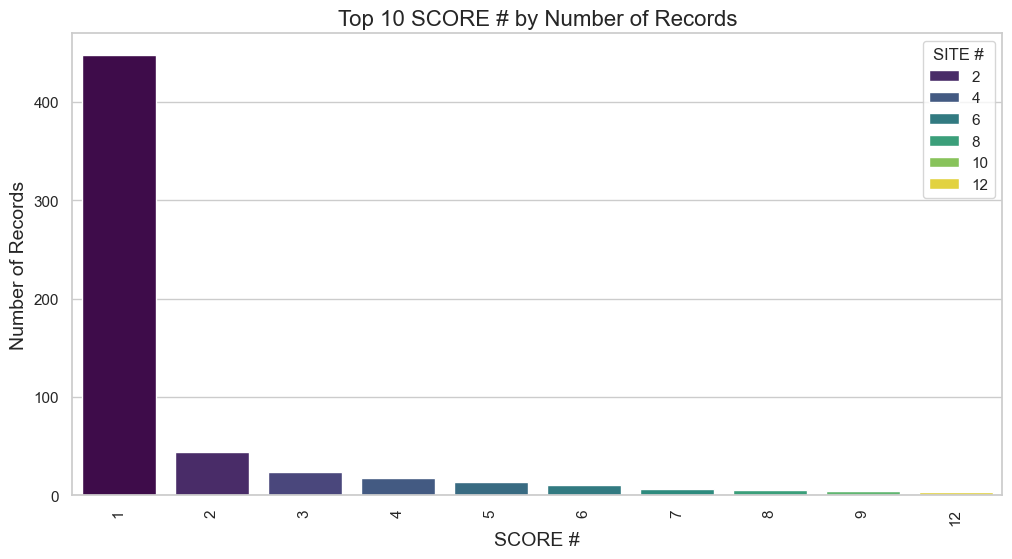

In [250]:
# Since this dataset has too many zip codes we limit to top 20
top_n = 10

# Get the top N ZIP codes by count
top_zip_codes = hpdf['SITE #'].value_counts().nlargest(top_n)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top N ZIP codes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette='viridis', hue=top_zip_codes.index)

plt.title(f'Top {top_n} SCORE # by Number of Records', fontsize=16)
plt.xlabel('SCORE #', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)


plt.xticks(rotation=90)

# Show the plot
plt.show()

In [251]:
hpdf['zip_code'] = hpdf['SITE ADDRESS'].astype(str).str[-6:].astype(int)

In [252]:
hpdf.head()

,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,...,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,JOBS,construction_type_n,zip_code
0,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,...,0,11/29/2001,0.00,0.0,0,0.00,2003,NaN,0.0,90017
1,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,...,0,05/02/2005,0.00,7103994.0,10208936,17312930.00,2006,NaN,6.0,90016
2,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,...,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,226.0,0.0,90011
3,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,...,0,04/02/2007,5281147.00,8428737.0,0,13709884.00,2009,110.0,0.0,90043
4,50036,WITMER HEIGHTS,In-Service,ACQUISITION + NEW CONSTRUCTION,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,49,...,0,01/19/2006,2846000.00,10865989.0,0,13711989.00,2008,95.0,NaN,90026


In [253]:


# Ensure 'JOBS' is of type str to filter out non-numeric rows
hpdf['JOBS'] = hpdf['JOBS'].astype(str)

# Identify non-numeric rows in the 'JOBS' column
non_numeric_jobs = pd.to_numeric(hpdf['JOBS'], errors='coerce').isna()
# [5] ChatGPT 
# Define the condition where LAHD FUNDED, TDC, or leverage is 0
condition = (hpdf['LAHD FUNDED'] == 0) | (hpdf['TDC'] == 0) | (hpdf['LEVERAGE'] == 0) | (hpdf['TAX EXEMPT CONDUIT BOND'] ==0)

# Replace NaN values in 'JOBS' with '0' for non-numeric rows and where the condition is met
hpdf.loc[non_numeric_jobs & condition, 'JOBS'] = '0'



In [254]:
# Now Check the non numeric jobs
nnj = hpdf[pd.to_numeric(hpdf['JOBS'], errors='coerce').isna()]

# Display the rows with non-numeric 'JOBS'
print("No. of Rows where JOBS in non-numeric: ", nnj[nnj.columns[0]].count())

nnj.describe()

No. of Rows where JOBS in non-numeric:  12


,SITE COUNCIL DISTRICT,SITE #,SITE UNITS,PROJECT TOTAL UNITS,SH UNITS PER SITE,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,construction_type_n,zip_code
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000
mean,7.000000,1.416667,51.750000,84.500000,11.666667,3.633113e+06,2.294289e+07,5.842908e+06,3.241891e+07,2013.083333,1.250000,90134.583333
std,3.789939,0.668558,41.043491,44.600245,28.681110,3.567032e+06,1.895854e+07,4.051996e+06,2.262987e+07,13.419513,1.288057,370.832101
min,1.000000,1.000000,0.000000,17.000000,0.000000,4.990600e+05,4.809923e+06,6.930140e+05,1.030898e+07,1998.000000,0.000000,90003.000000
25%,6.250000,1.000000,20.000000,56.750000,0.000000,5.356080e+05,1.379783e+07,2.411850e+06,1.911580e+07,1998.750000,1.000000,90017.000000
50%,8.000000,1.000000,36.500000,66.500000,0.000000,3.014663e+06,1.658418e+07,5.000000e+06,2.653473e+07,2019.500000,1.000000,90027.500000
75%,9.000000,2.000000,77.500000,127.500000,4.000000,6.002164e+06,2.966563e+07,1.014400e+07,4.061692e+07,2022.500000,1.000000,90038.750000
max,12.000000,3.000000,122.000000,144.000000,99.000000,1.040743e+07,7.114224e+07,1.152609e+07,8.364224e+07,2030.000000,5.000000,91311.000000


As we can see that we have added the imputed values and can remove other remaining rows, but that we do not use 'JOBs' hence we will not do that

# Summarize each file by ZIP code using SQL


In [255]:
import sqlite3

## For Restaurant and Market Health Inspections¶

In [256]:
#[6] ChatGPT
# Create a SQLite database and load the data
rdf['facility_zip'] = rdf['facility_zip'].astype(int)

# Create a SQLite database and load the data
conn = sqlite3.connect('health_inspections.db')
rdf.to_sql('inspections', conn, if_exists='replace', index=False)

# Verify that the data is loaded correctly
query = "SELECT * FROM inspections LIMIT 5;"
pd.read_sql(query, conn)

,activity_date,score,grade,service_code,service_description,facility_zip,pe_description,program_element_pe,program_name,program_status,graden,program_statusn,facility_type,risk_level
0,2017-12-29 00:00:00,95,A,1,ROUTINE INSPECTION,90065,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,3,1,RESTAURANT,MODERATE RISK
1,2017-12-29 00:00:00,92,A,1,ROUTINE INSPECTION,90045,RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,3,1,RESTAURANT,MODERATE RISK
2,2017-12-29 00:00:00,93,A,1,ROUTINE INSPECTION,90028,RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,3,1,RESTAURANT,LOW RISK
3,2017-12-29 00:00:00,94,A,1,ROUTINE INSPECTION,90026,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,3,1,RESTAURANT,MODERATE RISK
4,2017-12-29 00:00:00,94,A,1,ROUTINE INSPECTION,90026,RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,3,1,RESTAURANT,MODERATE RISK


In [257]:
query = """
SELECT 
    facility_zip AS ZIP,
    COUNT(*) AS num_records,                     -- Count of records per ZIP code
    AVG(score) AS avg_score,                     -- Average score per ZIP code
    MAX(score) AS max_score,                     -- Maximum score per ZIP code
    MIN(score) AS min_score,                     -- Minimum score per ZIP code
    AVG(graden) AS avg_graden,                   -- Average 'graden' per ZIP code
    MAX(graden) AS max_graden,                   -- Maximum 'graden' per ZIP code
    MIN(graden) AS min_graden,                   -- Minimum 'graden' per ZIP code
    AVG(program_element_pe) AS avg_program_pe,  -- Average 'program_element_pe' per ZIP code
    MAX(program_element_pe) AS max_program_pe,  -- Maximum 'program_element_pe' per ZIP code
    MIN(program_element_pe) AS min_program_pe,  -- Minimum 'program_element_pe' per ZIP code
    SUM(CASE WHEN risk_level = 'HIGH RISK' THEN 1 ELSE 0 END) AS high_risk_count,  -- Count of high risk projects per ZIP code
    SUM(CASE WHEN risk_level = 'MODERATE RISK' THEN 1 ELSE 0 END) AS moderate_risk_count,  -- Count of moderate risk projects per ZIP code
    SUM(CASE WHEN risk_level = 'LOW RISK' THEN 1 ELSE 0 END) AS low_risk_count  -- Count of low risk projects per ZIP code
FROM 
    inspections
GROUP BY 
    facility_zip
"""

# Execute the query and load the result into a DataFrame
summary_rdf = pd.read_sql(query, conn)

# Display the summarized data
summary_rdf

,ZIP,num_records,avg_score,max_score,min_score,avg_graden,max_graden,min_graden,avg_program_pe,max_program_pe,min_program_pe,high_risk_count,moderate_risk_count,low_risk_count
0,90001,1174,93.844974,100,71,2.934412,3,1,1624.431857,1641,1610,663,236,275
1,90002,265,94.649057,100,72,2.954717,3,1,1620.984906,1641,1610,104,80,81
2,90003,1184,92.693412,100,70,2.879223,3,1,1622.382601,1638,1610,571,289,324
3,90004,1424,92.866573,100,72,2.917837,3,1,1630.073736,1641,1610,986,266,172
4,90005,1656,91.426932,100,65,2.838768,3,1,1631.102657,1641,1610,1205,252,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,91505,4,97.250000,100,95,3.000000,3,3,1638.000000,1638,1638,4,0,0
95,91601,4,95.000000,97,93,3.000000,3,3,1611.000000,1611,1611,0,4,0
96,91602,3,95.666667,97,95,3.000000,3,3,1631.333333,1632,1631,1,2,0
97,91604,27,93.888889,98,86,2.962963,3,2,1633.962963,1635,1631,20,7,0


## For LAHD Affordable Housing Projects List

In [258]:
# Ensure ZIP codes are formatted as integers
hpdf['zip_code'] = hpdf['zip_code'].astype(int)

# Create a SQLite database and load the data
conn = sqlite3.connect('affordable_housing.db')
hpdf.to_sql('housing_projects', conn, if_exists='replace', index=False)

# Verify that the data is loaded correctly
query = "SELECT * FROM housing_projects LIMIT 5;"
pd.read_sql(query, conn)

,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,...,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,JOBS,construction_type_n,zip_code
0,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,...,0,11/29/2001,0.00,0.0,0,0.00,2003,0,0.0,90017
1,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,...,0,05/02/2005,0.00,7103994.0,10208936,17312930.00,2006,0,6.0,90016
2,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,...,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,226.0,0.0,90011
3,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,...,0,04/02/2007,5281147.00,8428737.0,0,13709884.00,2009,110.0,0.0,90043
4,50036,WITMER HEIGHTS,In-Service,ACQUISITION + NEW CONSTRUCTION,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,49,...,0,01/19/2006,2846000.00,10865989.0,0,13711989.00,2008,95.0,NaN,90026


In [259]:
#  SQL query to summarize data by ZIP code with correct column name quoting
query = """
SELECT 
    "zip_code" AS ZIP,
    COUNT(*) AS num_records,                      -- Count of records per ZIP code
    AVG("SITE UNITS") AS avg_site_units,            -- Average site units per ZIP code
    MAX("SITE UNITS") AS max_site_units,            -- Maximum site units per ZIP code
    MIN("SITE UNITS") AS min_site_units,            -- Minimum site units per ZIP code
    AVG("PROJECT TOTAL UNITS") AS avg_total_units,  -- Average total units per ZIP code
    MAX("PROJECT TOTAL UNITS") AS max_total_units,  -- Maximum total units per ZIP code
    MIN("PROJECT TOTAL UNITS") AS min_total_units,  -- Minimum total units per ZIP code
    AVG("LAHD FUNDED") AS avg_lahd_funded,          -- Average LAHD funded per ZIP code
    MAX("LAHD FUNDED") AS max_lahd_funded,          -- Maximum LAHD funded per ZIP code
    MIN("LAHD FUNDED") AS min_lahd_funded,          -- Minimum LAHD funded per ZIP code
    AVG("LEVERAGE") AS avg_leverage,                -- Average leverage per ZIP code
    MAX("LEVERAGE") AS max_leverage,                -- Maximum leverage per ZIP code
    MIN("LEVERAGE") AS min_leverage,                -- Minimum leverage per ZIP code
    AVG("TDC") AS avg_tdc,                          -- Average TDC per ZIP code
    MAX("TDC") AS max_tdc,                          -- Maximum TDC per ZIP code
    MIN("TDC") AS min_tdc,                          -- Minimum TDC per ZIP code
    COUNT(DISTINCT "CONSTRUCTION TYPE") AS num_construction_types -- Number of distinct construction types per ZIP code
FROM 
    housing_projects
GROUP BY 
    "zip_code"
"""

# Execute the query and load the result into a DataFrame
summary_hpdf = pd.read_sql(query, conn)

# Display the summarized data
summary_hpdf

,ZIP,num_records,avg_site_units,max_site_units,min_site_units,avg_total_units,max_total_units,min_total_units,avg_lahd_funded,max_lahd_funded,min_lahd_funded,avg_leverage,max_leverage,min_leverage,avg_tdc,max_tdc,min_tdc,num_construction_types
0,90002,19,38.842105,135,0,123.421053,257,25,2.710197e+06,6221279.0,0.0,1.645625e+07,60686295.0,0.0,2.557662e+07,69759157.0,0.0,2
1,90003,21,38.476190,257,0,117.523810,257,16,4.562558e+06,12000000.0,0.0,1.863290e+07,71142238.0,6340418.0,2.586435e+07,83642238.0,7940418.0,3
2,90004,13,52.230769,122,0,86.461538,251,40,5.122714e+06,9940000.0,0.0,2.057430e+07,48351139.0,0.0,2.667002e+07,56064860.0,9656868.0,3
3,90005,4,108.250000,283,0,172.500000,283,64,1.875250e+06,6610000.0,0.0,2.854807e+07,52443992.0,7103994.0,3.568981e+07,52443992.0,17312930.0,3
4,90006,25,43.360000,111,0,87.160000,232,25,3.078566e+06,10562521.0,0.0,1.666290e+07,46852813.0,0.0,2.096001e+07,47077567.0,3550000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,91406,2,70.000000,94,46,70.000000,94,46,7.650020e+06,9000040.0,6300000.0,1.810952e+07,21031906.0,15187140.0,2.575954e+07,30031946.0,21487140.0,1
74,91411,1,55.000000,55,55,55.000000,55,55,1.050525e+07,10505254.0,10505254.0,1.729327e+07,17293271.0,17293271.0,3.091952e+07,30919525.0,30919525.0,1
75,91601,4,60.250000,82,40,60.250000,82,40,2.406640e+06,4932825.0,0.0,1.302192e+07,19057134.0,7313159.0,1.875712e+07,24120894.0,13624546.0,2
76,91605,4,70.500000,100,49,70.500000,100,49,4.967976e+06,10527004.0,0.0,1.757665e+07,30468473.0,5835087.0,2.591431e+07,41028473.0,19280817.0,2


# Join the files using SQL by ZIP code

In [260]:
hpdf.to_sql('housing_projects', conn, if_exists='replace', index=False)
rdf.to_sql('health_inspections', conn, if_exists='replace', index=False)
# Perform INNER JOIN to only keep the zip codes which are in 

query = """
SELECT 
    hp."zip_code" AS ZIP,
    COUNT(*) AS num_records, -- Count of records per ZIP code
    AVG(hp."SITE UNITS") AS avg_site_units, -- Average site units from housing projects
    AVG(hp."PROJECT TOTAL UNITS") AS avg_total_units, -- Average total units from housing projects
    AVG(hp."LAHD FUNDED") AS avg_lahd_funded, -- Average LAHD funded from housing projects
    AVG(hp."LEVERAGE") AS avg_leverage, -- Average leverage from housing projects
    AVG(hp."TDC") AS avg_tdc, -- Average TDC from housing projects
    AVG(rf."score") AS avg_score, -- Average score from health inspections
    COUNT(DISTINCT rf."service_description") AS num_service_descriptions -- Number of distinct service descriptions from health inspections
FROM 
    housing_projects hp
INNER JOIN 
    health_inspections rf
ON 
    hp."zip_code" = rf."facility_zip"
GROUP BY 
    hp."zip_code"
"""

# Execute the query and load the result into a DataFrame
summary_df = pd.read_sql(query, conn)

# Display the summarized data
summary_df

,ZIP,num_records,avg_site_units,avg_total_units,avg_lahd_funded,avg_leverage,avg_tdc,avg_score,num_service_descriptions
0,90002,5035,38.842105,123.421053,2.710197e+06,1.645625e+07,2.557662e+07,94.649057,2
1,90003,24864,38.476190,117.523810,4.562558e+06,1.863290e+07,2.586435e+07,92.693412,2
2,90004,18512,52.230769,86.461538,5.122714e+06,2.057430e+07,2.667002e+07,92.866573,2
3,90005,6624,108.250000,172.500000,1.875250e+06,2.854807e+07,3.568981e+07,91.426932,2
4,90006,52825,43.360000,87.160000,3.078566e+06,1.666290e+07,2.096001e+07,92.740653,2
5,90007,22698,23.333333,123.388889,1.201473e+06,1.327902e+07,1.970916e+07,94.804917,2
6,90008,970,86.000000,86.000000,4.250000e+06,1.990436e+07,2.415436e+07,94.152577,2
7,90011,39844,35.964286,92.964286,4.785457e+06,1.725269e+07,2.438546e+07,93.328180,2
8,90012,28220,160.900000,160.900000,5.853644e+06,2.472825e+07,5.967944e+07,93.417080,2
9,90013,14183,112.615385,112.615385,8.515944e+06,2.501918e+07,3.832065e+07,94.505958,2


# Formulate and test the hypothesis.

In [261]:
from scipy.stats import ttest_ind

## Hypothesis Statement

The statistics of “affordable housing projects” (government housing for low-income people) in a ZIP code has a relation to
the health inspection scores of the restaurants in that ZIP code.

### Null Hypothesis (H0):
There is no significant relationship between the statistics of “affordable housing projects” (government housing for low-income people) in a ZIP code and the health inspection scores of the restaurants in that ZIP code. In other words, the variables related to affordable housing projects do not correlate with the health inspection scores.

### Alternative Hypothesis (H1):
There is a significant relationship between the statistics of “affordable housing projects” (government housing for low-income people) in a ZIP code and the health inspection scores of the restaurants in that ZIP code. In other words, the variables related to affordable housing projects do correlate with the health inspection scores.

### Test and Analysis

To test the hypothesis regarding the relationship between affordable housing project statistics and health inspection scores, I performed a correlation analysis. This analysis helps determine whether there is a significant linear relationship between these variables.



In [262]:
summary_df.corr()

,ZIP,num_records,avg_site_units,avg_total_units,avg_lahd_funded,avg_leverage,avg_tdc,avg_score,num_service_descriptions
ZIP,1.000000,-0.271629,0.089006,-0.061316,0.032428,-0.179346,-0.112129,0.370989,-0.794861
num_records,-0.271629,1.000000,-0.015560,0.188634,-0.108914,0.001339,0.043208,-0.096842,0.274039
avg_site_units,0.089006,-0.015560,1.000000,0.287919,0.564985,0.502686,0.705773,-0.006079,-0.003850
avg_total_units,-0.061316,0.188634,0.287919,1.000000,0.002709,0.126458,0.294083,0.250747,-0.150436
avg_lahd_funded,0.032428,-0.108914,0.564985,0.002709,1.000000,0.340772,0.531320,0.016698,-0.014583
avg_leverage,-0.179346,0.001339,0.502686,0.126458,0.340772,1.000000,0.880734,-0.199586,0.107994
avg_tdc,-0.112129,0.043208,0.705773,0.294083,0.531320,0.880734,1.000000,-0.080664,0.061118
avg_score,0.370989,-0.096842,-0.006079,0.250747,0.016698,-0.199586,-0.080664,1.000000,-0.347614
num_service_descriptions,-0.794861,0.274039,-0.003850,-0.150436,-0.014583,0.107994,0.061118,-0.347614,1.000000


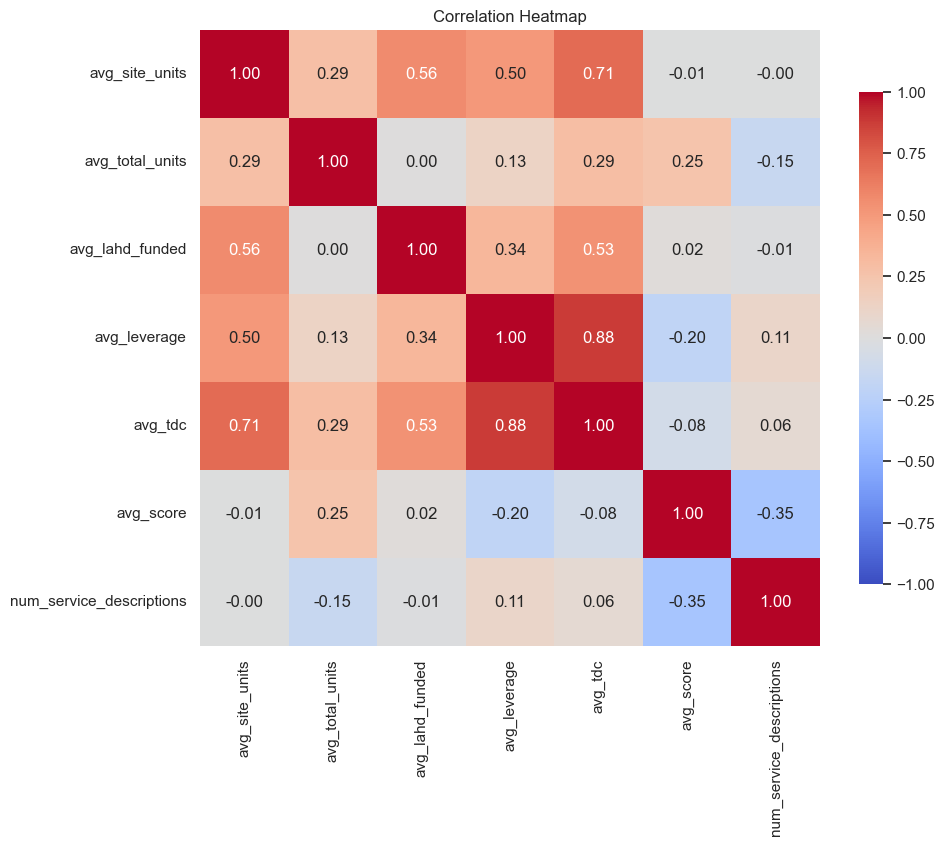

In [263]:
corr_matrix = summary_df[['avg_site_units', 'avg_total_units', 'avg_lahd_funded',
                          'avg_leverage', 'avg_tdc', 'avg_score', 'num_service_descriptions']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1,
            cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

From the above plot and correlation table we can see that the average score does not correlates to any other variable in the dataset. Hence We can come to conclusion that hypothesis that the statistics of
“affordable housing projects” (government housing for low-income people) in a ZIP code has a relation to the health inspection scores of the restaurants in that ZIP code is not true.


## Hypothesis Statement

In this analysis, we are investigating whether the average number of jobs created in the “In-Service” stage is higher compared to the “Development” stage.

## Hypothesis:

**Null Hypothesis (H0)**: The average number of jobs created during the “In-Service” stage is equal to or less than the average number of jobs created during the “Development” stage.

 $\mu_{\text{In-Service}} \leq \mu_{\text{Development}}$
 
**Alternative Hypothesis (H1)** : The average number of jobs created during the “In-Service” stage is greater than the average number of jobs created during the “Development” stage.

 $\mu_{\text{In-Service}} > \mu_{\text{Development}}$


 ### Analysis
 To test this hypothesis, I analyzed job creation data across different development stages. The average number of jobs created at each stage was plotted to visualize the comparison.
 

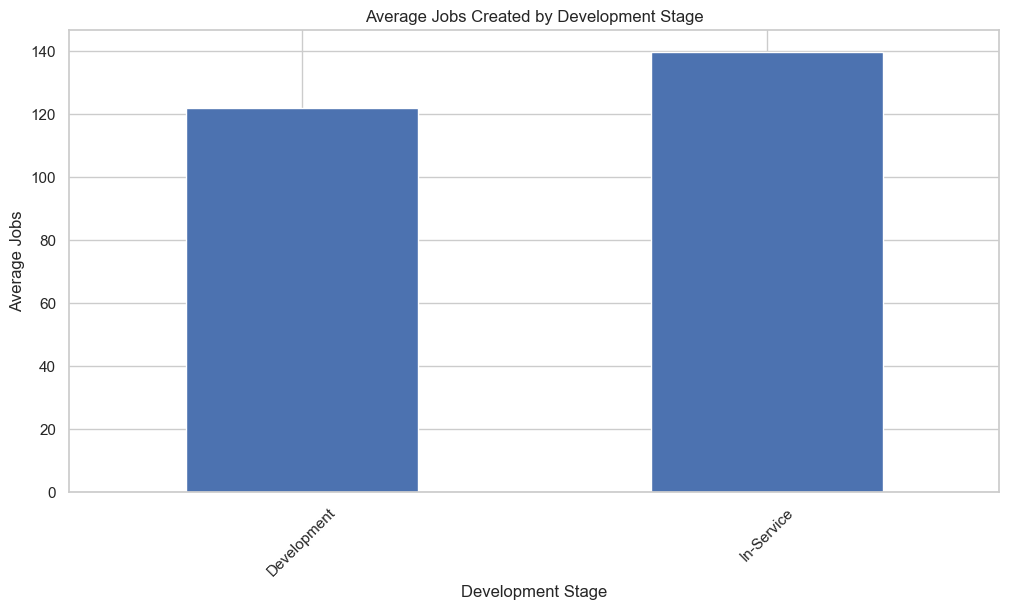

In [264]:

df = hpdf
df['JOBS'] = pd.to_numeric(df['JOBS'], errors='coerce')
df['DATE FUNDED'] = pd.to_datetime(df['DATE FUNDED'], errors='coerce')
df['IN-SERVICE DATE'] = pd.to_datetime(df['IN-SERVICE DATE'], errors='coerce')

# Plot job creation by development stage
plt.figure(figsize=(12, 6))
df.groupby('DEVELOPMENT STAGE')['JOBS'].mean().plot(kind='bar')
plt.title('Average Jobs Created by Development Stage')
plt.xlabel('Development Stage')
plt.ylabel('Average Jobs')
plt.xticks(rotation=45)
plt.show()

As we can see from the above plot that our hypothesis is confirmed.

### Hypothesis Test

To test whether the “In-Service” stage results in a significantly higher number of jobs compared to the “Development” stage, we conducted a t-test.

In [265]:
development_jobs = df[df['DEVELOPMENT STAGE'] == 'Development']['JOBS'].dropna()
in_service_jobs = df[df['DEVELOPMENT STAGE'] == 'In-Service']['JOBS'].dropna()

#[7]  Perform t-test 
t_stat, p_value = ttest_ind(in_service_jobs, development_jobs, alternative='greater')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Average jobs created in 'In-Service' stage is significantly greater than in 'Development' stage.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average jobs created between 'In-Service' and 'Development' stages.")

T-Statistic: 0.8452290373806282
P-Value: 0.1991657530520523
Fail to reject the null hypothesis: No significant difference in average jobs created between 'In-Service' and 'Development' stages.


## Resources Used
[1] - ChatGPT Prompt: How to make better looking barplot
[2] - ChatGPT Prompt: Suggest a way to plot the graph where there are two discrete values types for example and one numerical(continuous data)
[3] - ChatGPT Prompt : Write re to find this "HIGH RISK", "MODERATE RISK", "LOW RISK"  pattern in the string 
[4] - ChatGPT Prompt: How to check if the value is a row for a column is from a list 
[5] - ChatGPT Prompt: How to find rows which satisfies various different conditions 
[6] - ChatGPT Prompt: How to use SQL inside inside ipynb explain with example 
[7] - ChatGPT Prompt: How to perform T-Test in python

Some paragraphs were rephrased - like the hypothesis using ChatGPT, prompt for that was : rephrase this hypothesis/statement.
